<h1 style="text-align: center;">Financial Fraud Detection</h1>  

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit, learning_curve
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
warnings.filterwarnings("ignore")

In [47]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
144601,86258.0,0.077662,1.072256,0.268596,0.971457,0.539215,-1.194876,1.004247,-0.308861,-0.651307,...,0.158760,0.673003,0.042422,0.424378,-0.673901,-0.418697,0.438781,0.235421,8.99,0
118388,75059.0,1.511959,-1.132264,0.085288,-1.610934,-1.199595,-0.255605,-1.086771,0.006174,-1.888359,...,-0.222331,-0.355773,-0.077298,-0.548729,0.427166,-0.169989,0.015979,0.002087,25.00,0
251687,155459.0,0.333215,-0.738123,1.013667,-2.833729,-0.068939,-0.202753,0.897208,-1.354412,-1.191390,...,-0.279061,0.395266,-0.250831,-0.351469,-0.573505,-0.426285,-1.257627,-1.072651,50.00,0
214921,139871.0,0.076437,0.833142,-0.188996,-0.868282,1.062643,-0.246415,1.021289,-0.102815,-0.106432,...,-0.299171,-0.716003,0.040156,0.039445,-0.342668,0.147987,0.240110,0.099482,16.99,0
127440,78332.0,-0.365262,0.352950,1.235342,0.206681,0.404648,-0.141808,0.336398,-0.030294,0.018609,...,0.018936,0.253360,-0.168856,-0.353348,-0.247194,0.713772,0.116010,0.150288,23.00,0
206045,136043.0,1.978539,-1.073296,-1.684015,-0.418883,-0.502997,-0.760286,-0.187700,-0.242412,-0.621486,...,0.051632,0.542666,-0.155747,-0.284015,0.170088,1.003617,-0.099541,-0.072195,108.78,0
274612,166116.0,1.830106,-0.984741,-2.578955,-0.225778,-0.004668,-1.667303,0.907382,-0.771143,-1.266197,...,0.038905,0.304819,-0.280711,0.086982,0.427617,0.997837,-0.155813,-0.053738,224.98,0
247512,153600.0,-0.352465,-0.394064,2.199092,-2.211997,-0.705251,0.576026,-0.531335,0.279636,0.285417,...,0.134252,0.835334,-0.280972,-0.455794,-0.312599,-0.304514,0.261861,-0.020280,1.00,0
200496,133457.0,1.922670,0.270253,-2.495880,1.343510,0.985827,-0.791473,0.686128,-0.201159,-0.123413,...,0.142548,0.402991,-0.094013,0.587172,0.523957,-0.436433,-0.037675,-0.038713,50.23,0
171924,120879.0,2.232155,-0.646169,-1.261706,-0.887429,-0.587466,-1.360068,-0.318908,-0.447310,-0.578419,...,0.448312,1.356885,-0.025471,0.054461,0.219061,0.075496,-0.031222,-0.064277,11.00,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.duplicated().sum()

1081

In [10]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()["Class"]
print(correlation_matrix)


Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64


<h1>EDA</h1>

<Axes: xlabel='Class'>

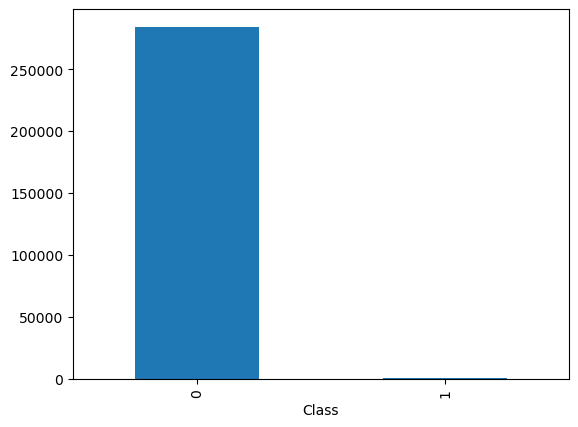

In [11]:
df['Class'].value_counts().plot(kind='bar')

(array([284315.,      0.,      0.,      0.,    492.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

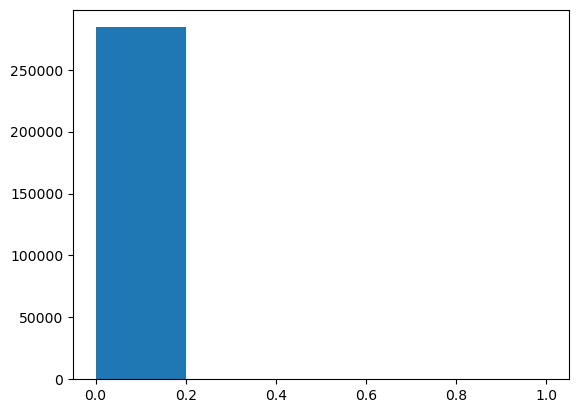

In [12]:
plt.hist(df['Class'],bins=5)

<Axes: xlabel='Amount', ylabel='Class'>

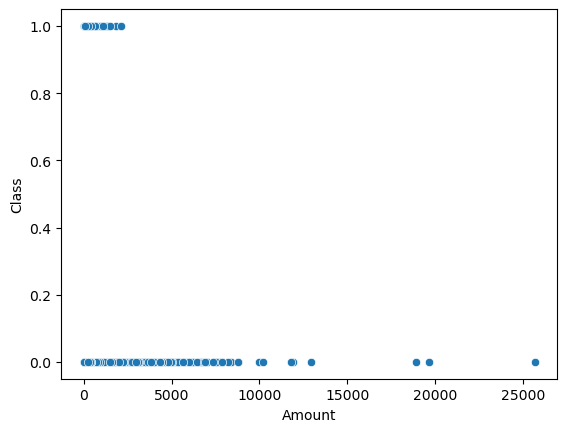

In [13]:
sns.scatterplot(x='Amount', y='Class',data=df)

In [14]:
 # The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<h1>Data Standardization</h1>

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [16]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_amount', 'scaled_time'],
      dtype='object')

In [17]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [18]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


<h1>Splitting the Data (Original DataFrame).</h1><h5>Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set</h5>

In [19]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Check the distribution of fraud and non-fraud cases
print('No Frauds:', round(df['Class'].value_counts()[0] / len(df) * 100, 2), '% of the dataset')
print('Frauds:', round(df['Class'].value_counts()[1] / len(df) * 100, 2), '% of the dataset')

# Separate features and target
X = df.drop(columns=['Class'])  # More robust way to drop columns
y = df['Class']

# Stratified K-Fold Cross Validation
sss = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train indices:", train_index[:10], "...")  # Print only first 10 indices for readability
    print("Test indices:", test_index[:10], "...")

    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Convert to NumPy arrays if needed for model training
original_Xtrain = original_Xtrain.to_numpy()
original_Xtest = original_Xtest.to_numpy()
original_ytrain = original_ytrain.to_numpy()
original_ytest = original_ytest.to_numpy()

# Check class distribution in train and test sets
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)

print('-' * 100)
print('Label Distributions:')
print("Train set:", train_counts_label / len(original_ytrain))
print("Test set:", test_counts_label / len(original_ytest))


No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset
Train indices: [ 0  1  2  3  4  6  8 11 12 13] ...
Test indices: [ 5  7  9 10 16 18 21 35 49 52] ...
Train indices: [ 0  3  4  5  6  7  8  9 10 11] ...
Test indices: [ 1  2 13 17 23 28 32 38 41 44] ...
Train indices: [ 1  2  5  7  9 10 11 13 14 15] ...
Test indices: [ 0  3  4  6  8 12 20 30 31 34] ...
Train indices: [0 1 2 3 4 5 6 7 8 9] ...
Test indices: [14 19 27 33 37 39 40 43 45 51] ...
Train indices: [0 1 2 3 4 5 6 7 8 9] ...
Test indices: [11 15 22 24 25 26 29 36 46 48] ...
----------------------------------------------------------------------------------------------------
Label Distributions:
Train set: [0.99827076 0.00172924]
Test set: [0.99827952 0.00172048]


<h1>Random Under-Sampling</h1>

In [20]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
160348,0.041920,0.335847,-1.527899,0.234218,-0.644114,-0.253394,1.109576,-1.147311,0.393350,-1.853775,...,-1.187438,1.607878,0.619424,0.808904,-0.020622,0.238910,-0.135236,0.380336,-0.154094,0
6774,-0.293440,-0.894794,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,...,0.549613,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,1
182027,-0.223573,0.476192,-0.761325,0.199286,0.281936,-2.725685,-0.874945,-0.201822,-0.762045,0.443707,...,-0.431701,0.007711,0.364609,-0.007128,0.495411,-0.450496,-0.321513,-0.476968,-0.174810,0
274382,-0.307413,0.955004,-5.766879,-8.402154,0.056543,6.950983,9.880564,-5.773192,-5.748879,0.721743,...,2.493224,0.880395,-0.130436,2.241471,0.665346,-1.890041,-0.120803,0.073269,0.583799,1
238466,-0.064417,0.763449,1.833191,0.745333,-1.133009,3.893556,0.858164,0.910235,-0.498200,0.344703,...,-0.085579,0.039289,0.181652,0.072981,-0.155299,-0.149891,0.012792,0.040854,0.022903,1


<h1>Equally Distributing and Correlating:</h1>

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


C:\Users\rishi\AppData\Local\Temp\ipykernel_27400\1731946183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=new_df, palette=colors)  # 'x' is required instead of a direct column name


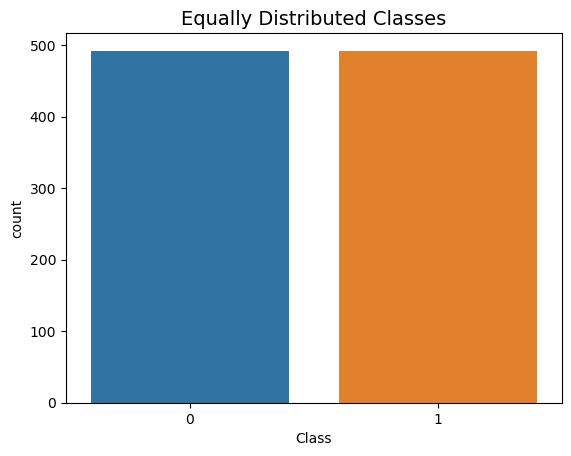

In [21]:
# Define a color palette 
colors = ['#1f77b4', '#ff7f0e']  # Blue for Class 0, Orange for Class 1

# Print class distribution
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

# Plot class distribution
sns.countplot(x='Class', data=new_df, palette=colors)  # 'x' is required instead of a direct column name
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


<h1>Correlation Matrices</h1>

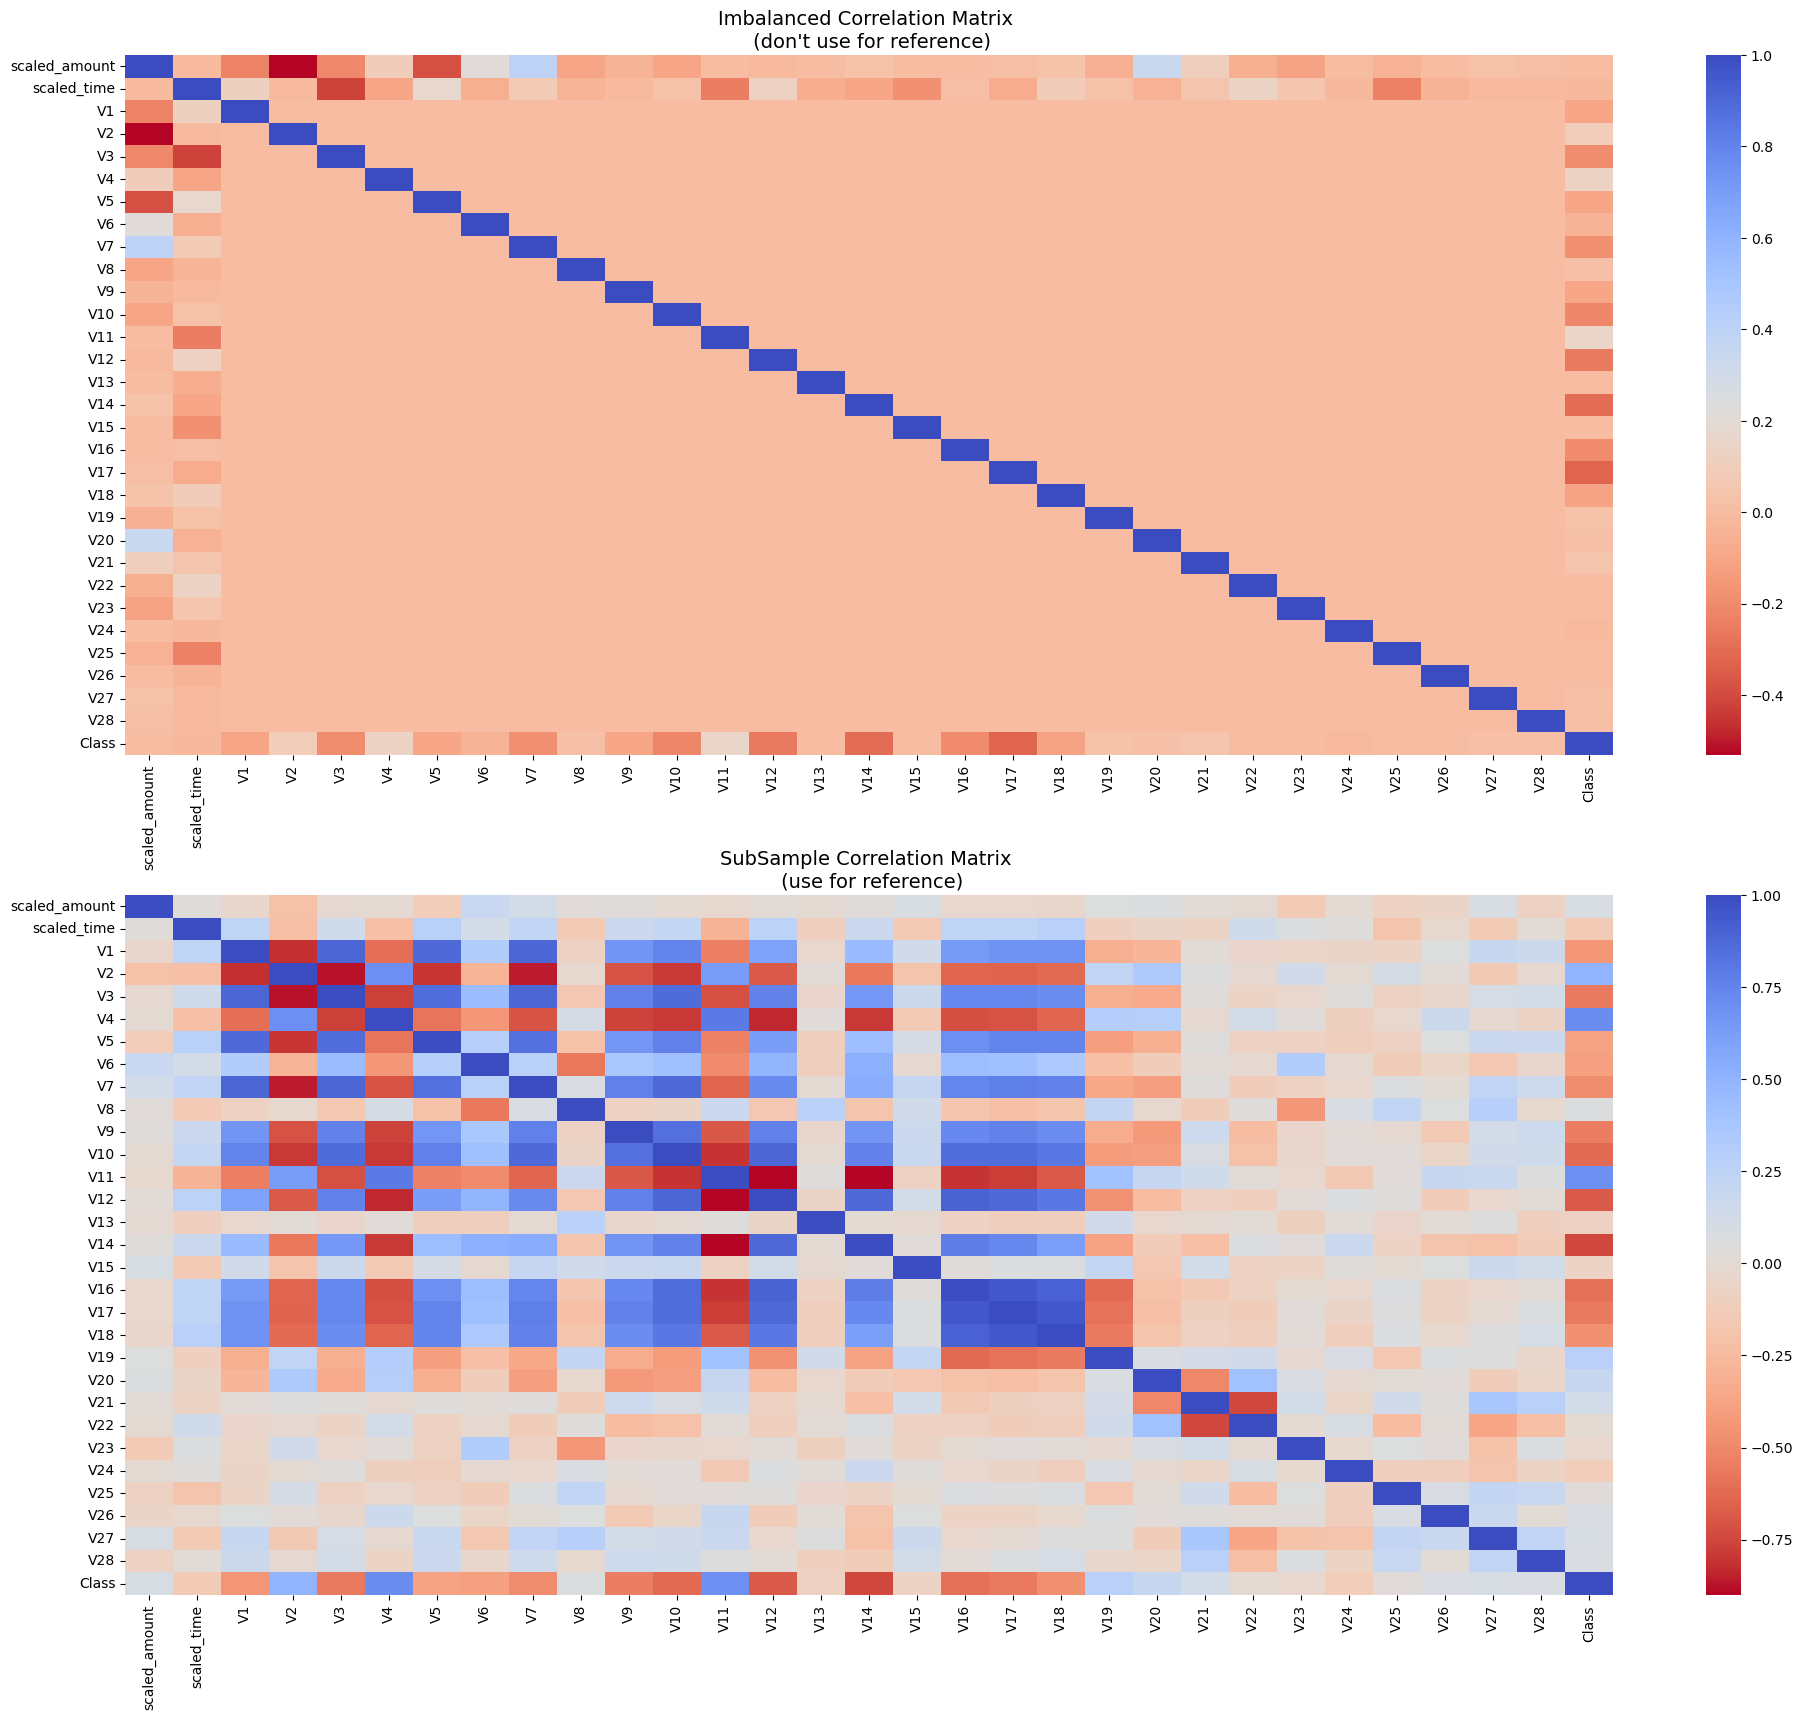

In [22]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

C:\Users\rishi\AppData\Local\Temp\ipykernel_27400\2099478156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
C:\Users\rishi\AppData\Local\Temp\ipykernel_27400\2099478156.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
C:\Users\rishi\AppData\Local\Temp\ipykernel_27400\2099478156.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
C:\Users\rishi\AppData\L

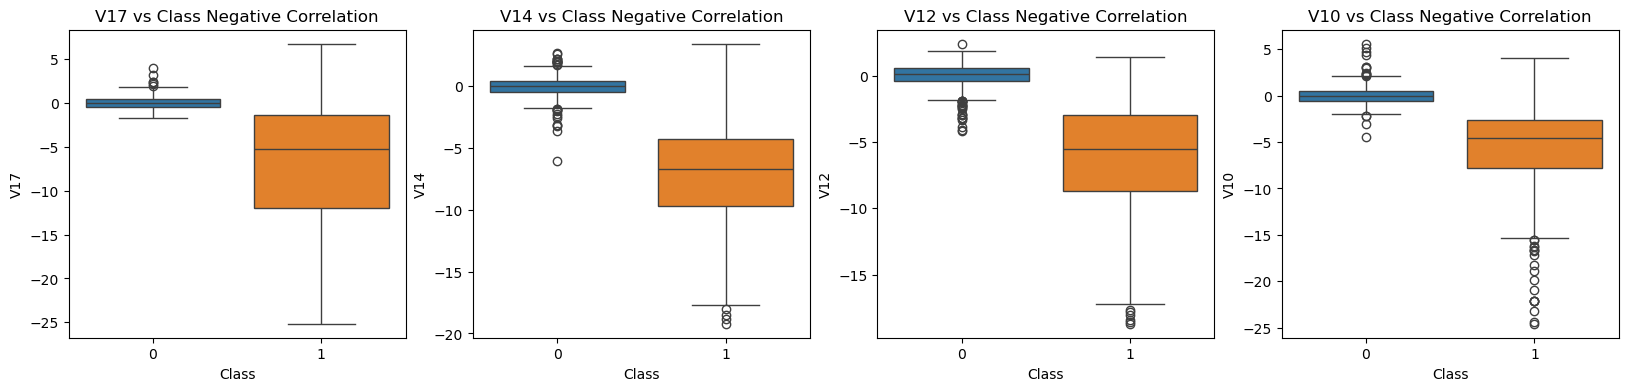

In [23]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

C:\Users\rishi\AppData\Local\Temp\ipykernel_27400\3532023837.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
C:\Users\rishi\AppData\Local\Temp\ipykernel_27400\3532023837.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
C:\Users\rishi\AppData\Local\Temp\ipykernel_27400\3532023837.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
C:\Users\rishi\AppData\Loc

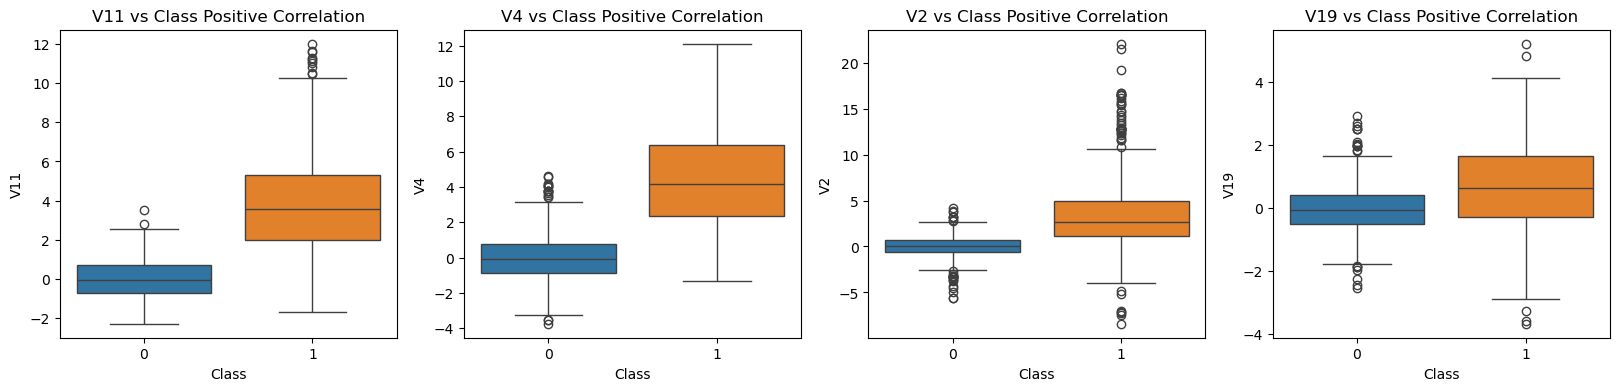

In [24]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

<h1>Anomaly Detection</h1>

C:\Users\rishi\AppData\Local\Temp\ipykernel_27400\3538466111.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
C:\Users\rishi\AppData\Local\Temp\ipykernel_27400\3538466111.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v12_fraud_dist,ax=a

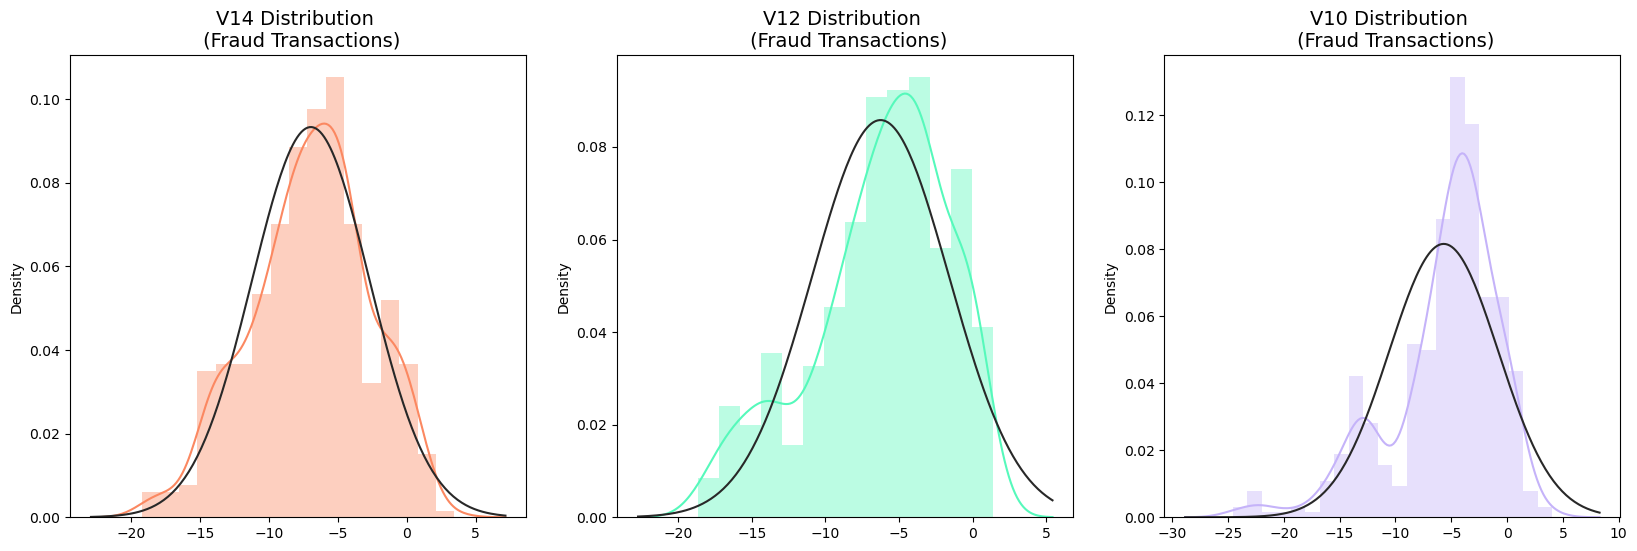

In [25]:

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [26]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.4937733551053, -18.8220867423816, -18.0499976898594]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.6837146333443, -18.0475965708216, -18.5536970096458, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-22.1870885620007, -15.563791

C:\Users\rishi\AppData\Local\Temp\ipykernel_27400\3867450625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
C:\Users\rishi\AppData\Local\Temp\ipykernel_27400\3867450625.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
C:\Users\rishi\AppData\Local\Temp\ipykernel_27400\3867450625.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)


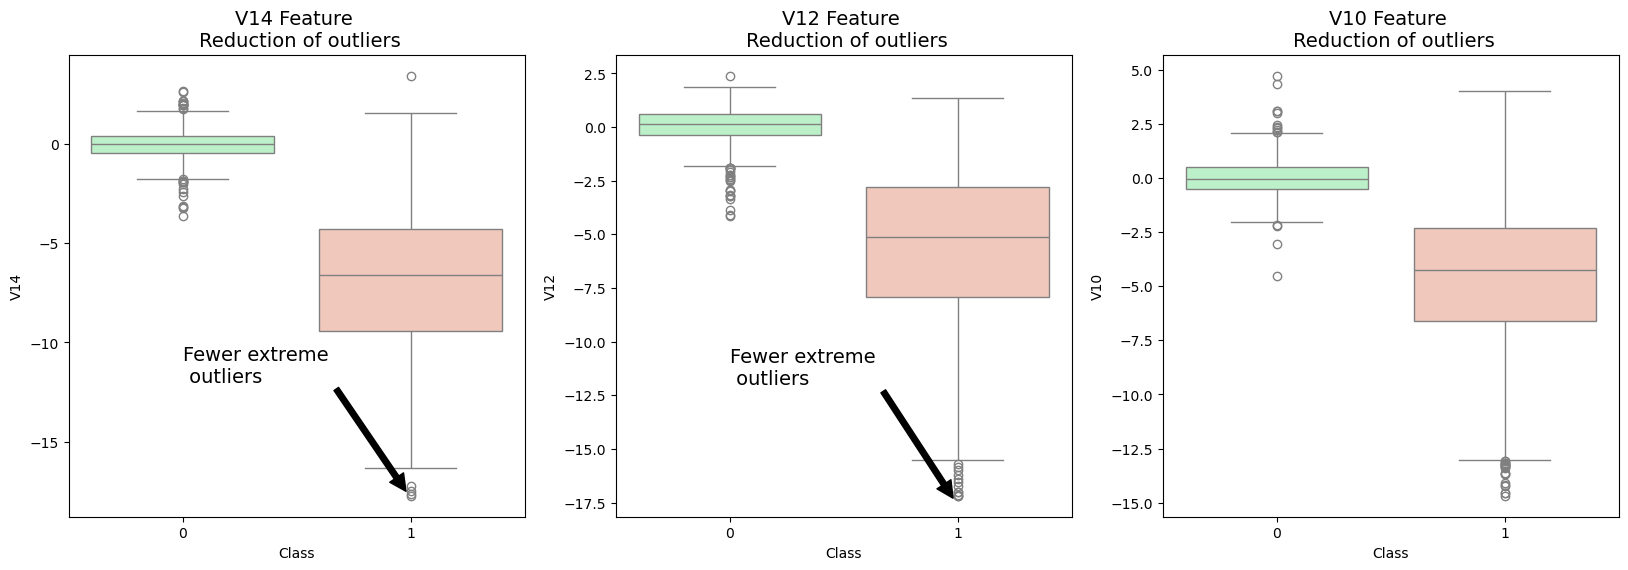

In [27]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

<h1>Dimensionality Reduction and Clustering</h1>

In [28]:
# New_df is from the random undersample data (fewer instances)

X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 7.1 s
PCA took 0.034 s
Truncated SVD took 0.087 s


<h1>Clusters Using Dimesnional reduction</h1>

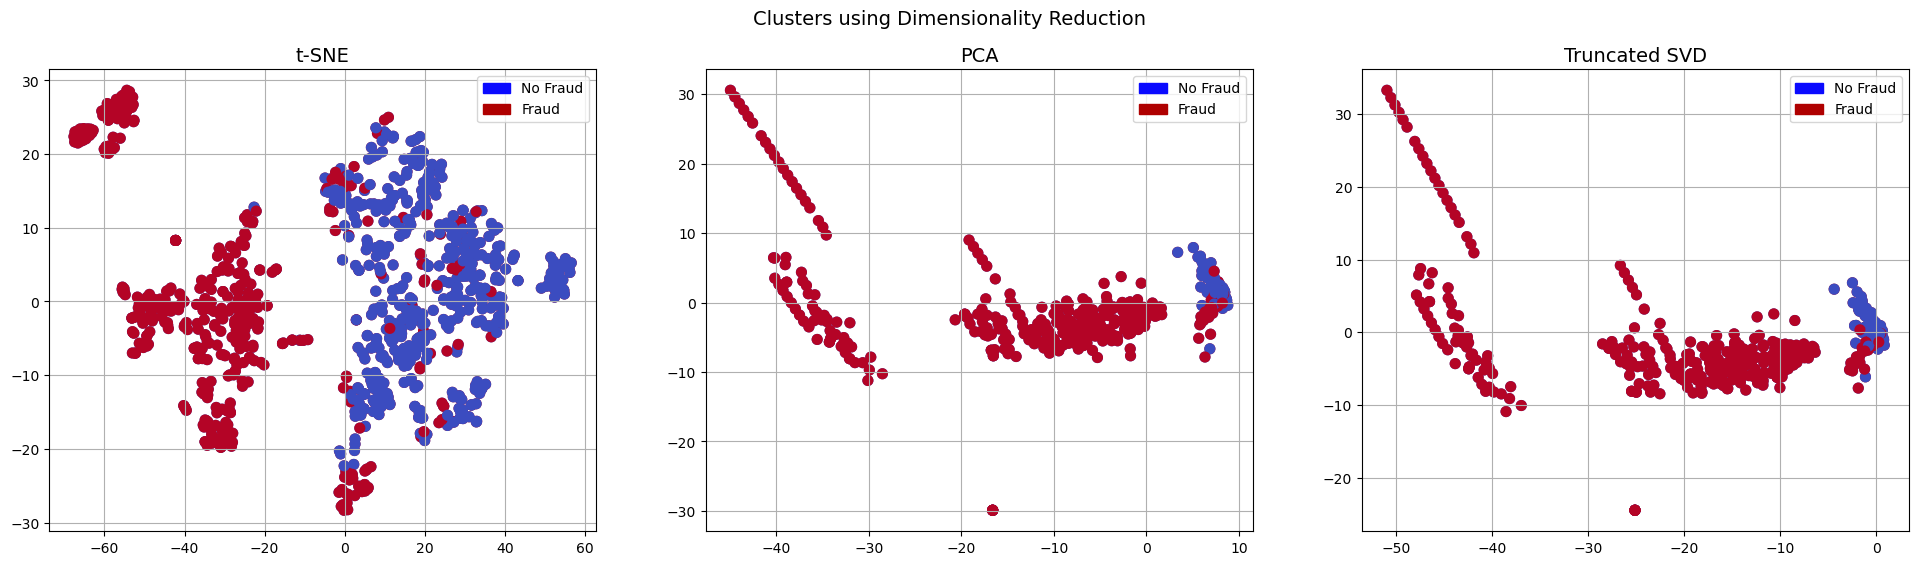

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

<h1>Classifiers (UnderSampling):</h1>

In [41]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [42]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

<h1>Implementing The Model</h1>

In [44]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [34]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [45]:
def plot_single_learning_curve(estimator, X, y, title, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="Cross-validation score")

    plt.title(title, fontsize=14)
    plt.xlabel('Training size (m)')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend(loc="best")
    plt.show()


In [46]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)


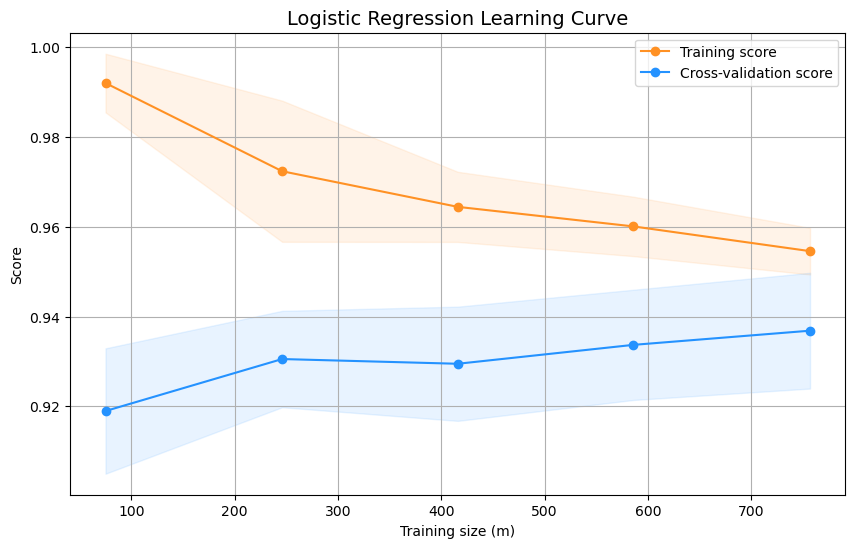

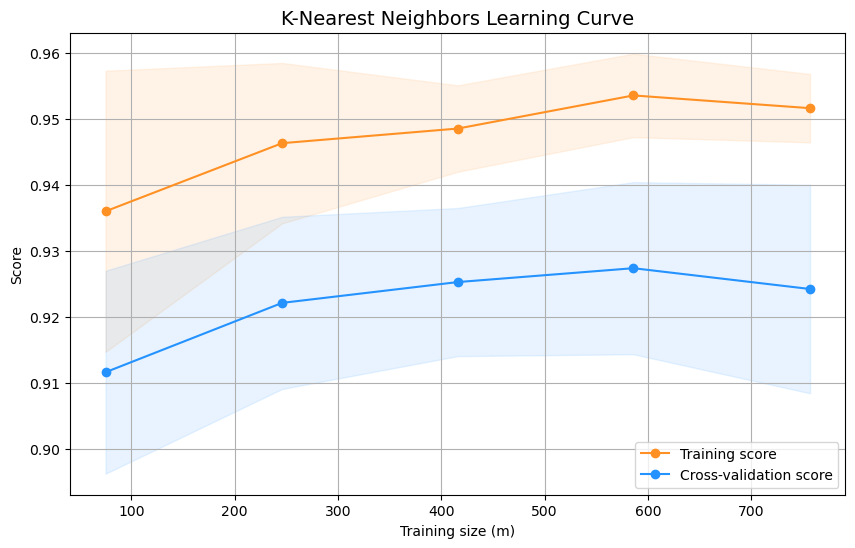

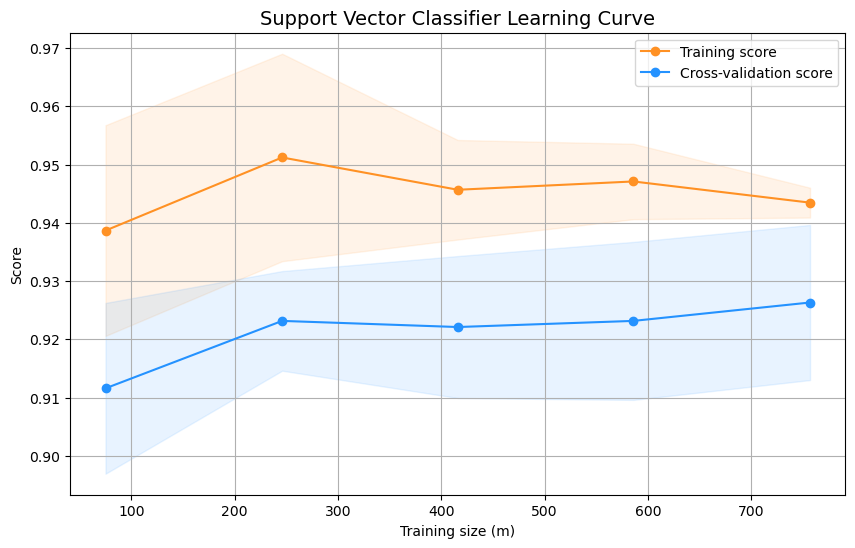

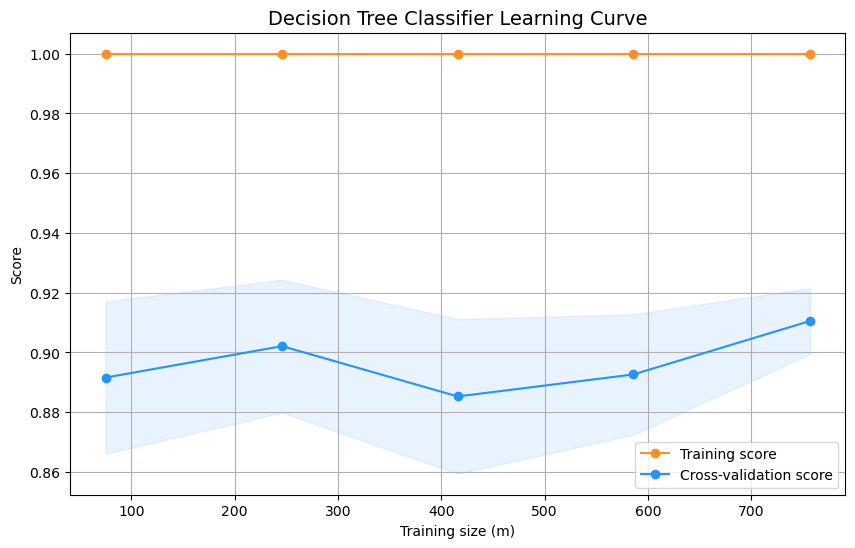

In [37]:
# Define models
logistic_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()
svc_clf = SVC()
dt_clf = DecisionTreeClassifier()

# Plot one by one to prevent crashes
plot_single_learning_curve(logistic_clf, X, y, "Logistic Regression Learning Curve", cv=cv)
plot_single_learning_curve(knn_clf, X, y, "K-Nearest Neighbors Learning Curve", cv=cv)
plot_single_learning_curve(svc_clf, X, y, "Support Vector Classifier Learning Curve", cv=cv)
plot_single_learning_curve(dt_clf, X, y, "Decision Tree Classifier Learning Curve", cv=cv)

<h1>Evaluation Metrics & Model Performance</h1>

In [38]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Logistic Regression (uses decision_function)
log_reg_pred = cross_val_predict(logistic_clf, X_train, y_train, cv=5, method="decision_function")

# K-Nearest Neighbors (uses predict_proba)
knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=5, method="predict_proba")[:, 1]

# Support Vector Classifier (uses decision_function)
svc_pred = cross_val_predict(svc_clf, X_train, y_train, cv=5, method="decision_function")

# Decision Tree (uses predict_proba)
dt_pred = cross_val_predict(dt_clf, X_train, y_train, cv=5, method="predict_proba")[:, 1]



In [39]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))  # decision_function
print('K-Nearest Neighbors: ', roc_auc_score(y_train, knn_pred))  # predict_proba[:, 1]
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))  # decision_function
print('Decision Tree Classifier: ', roc_auc_score(y_train, dt_pred))  # predict_proba[:, 1]


Logistic Regression:  0.9855619911021573
K-Nearest Neighbors:  0.9766746411483254
Support Vector Classifier:  0.9855549959428076
Decision Tree Classifier:  0.8987380732533086


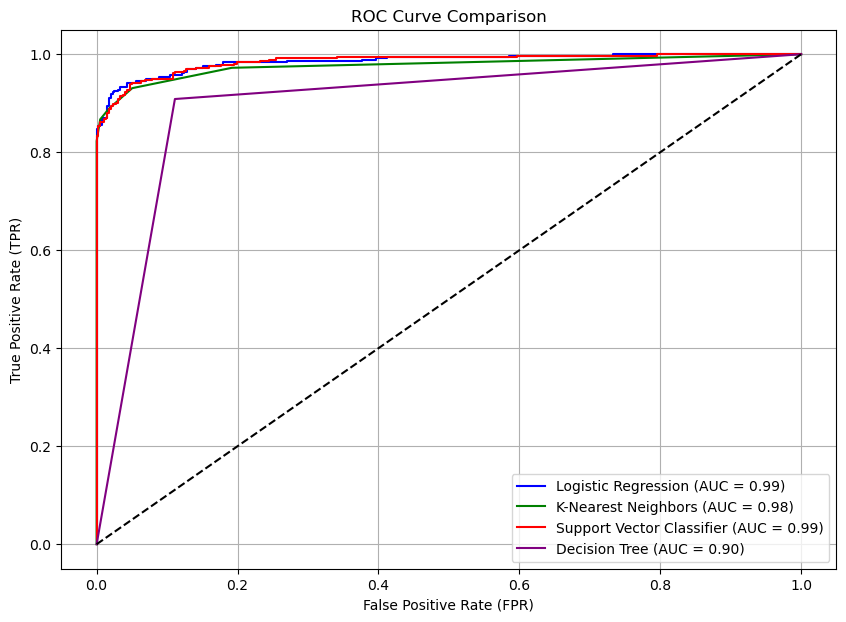

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC score for each classifier
fpr_log, tpr_log, _ = roc_curve(y_train, log_reg_pred)
fpr_knn, tpr_knn, _ = roc_curve(y_train, knn_pred)
fpr_svc, tpr_svc, _ = roc_curve(y_train, svc_pred)
fpr_dt, tpr_dt, _ = roc_curve(y_train, dt_pred)

# Calculate AUC (Area Under Curve)
auc_log = auc(fpr_log, tpr_log)
auc_knn = auc(fpr_knn, tpr_knn)
auc_svc = auc(fpr_svc, tpr_svc)
auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='blue')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {auc_knn:.2f})', color='green')
plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Classifier (AUC = {auc_svc:.2f})', color='red')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='purple')

# Plot diagonal line for random performance
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# Labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()


In [62]:
# Train all models
logistic_clf.fit(X_train, y_train)
knn_clf.fit(X_train, y_train)
svc_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

# Now make predictions on the test set
y_pred_log_reg = logistic_clf.predict(X_test)
y_pred_knn = knn_clf.predict(X_test)
y_pred_svc = svc_clf.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": y_pred_log_reg,
    "K-Nearest Neighbors": y_pred_knn,
    "Support Vector Classifier": y_pred_svc,
    "Decision Tree": y_pred_dt
}

print("📌 Model Evaluation on Test Data")
for model_name, y_pred in models.items():
    print(f"\n🔹 {model_name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")


📌 Model Evaluation on Test Data

🔹 Logistic Regression Performance:
Accuracy: 0.9263
Precision: 0.9659
Recall: 0.8854
F1 Score: 0.9239
ROC-AUC Score: 0.9268

🔹 K-Nearest Neighbors Performance:
Accuracy: 0.9053
Precision: 0.9535
Recall: 0.8542
F1 Score: 0.9011
ROC-AUC Score: 0.9058

🔹 Support Vector Classifier Performance:
Accuracy: 0.9263
Precision: 0.9767
Recall: 0.8750
F1 Score: 0.9231
ROC-AUC Score: 0.9269

🔹 Decision Tree Performance:
Accuracy: 0.8947
Precision: 0.9419
Recall: 0.8438
F1 Score: 0.8901
ROC-AUC Score: 0.8953


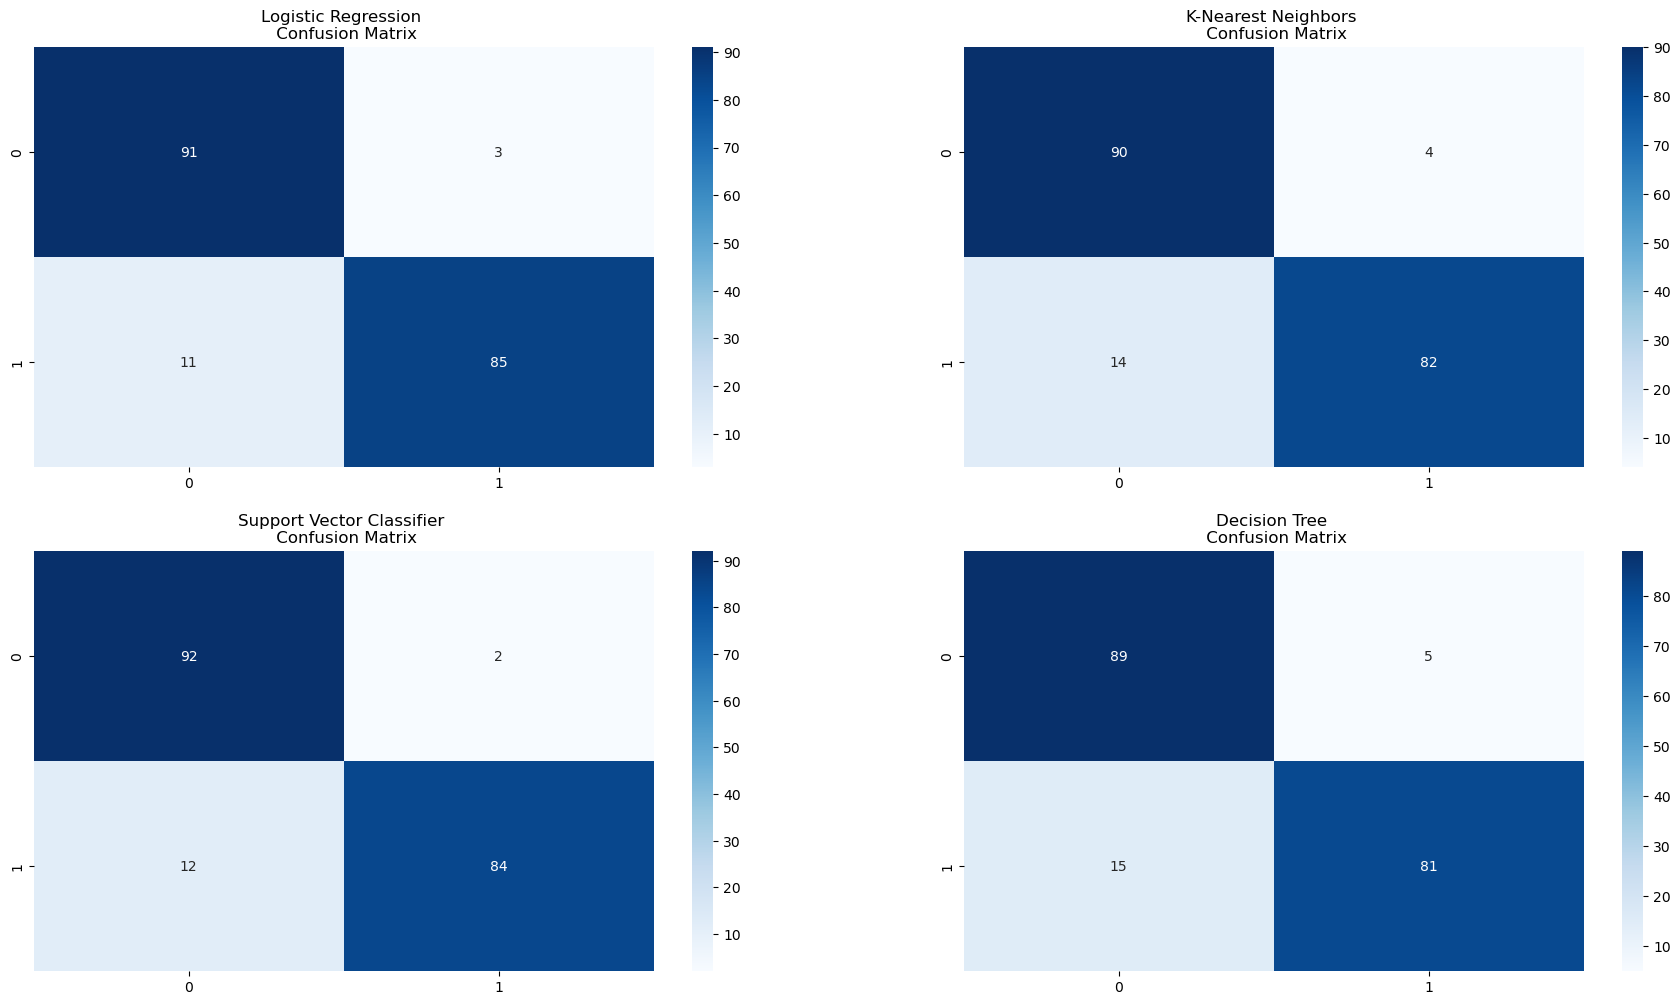

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(2, 2, figsize=(22, 12))

# Compute confusion matrices
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
knn_cf = confusion_matrix(y_test, y_pred_knn)
svc_cf = confusion_matrix(y_test, y_pred_svc)
dt_cf = confusion_matrix(y_test, y_pred_dt)

# Plot confusion matrices
sns.heatmap(log_reg_cf, ax=ax[0, 0], annot=True, cmap="Blues", fmt="d")
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix")

sns.heatmap(knn_cf, ax=ax[0, 1], annot=True, cmap="Blues", fmt="d")
ax[0, 1].set_title("K-Nearest Neighbors \n Confusion Matrix")

sns.heatmap(svc_cf, ax=ax[1, 0], annot=True, cmap="Blues", fmt="d")
ax[1, 0].set_title("Support Vector Classifier \n Confusion Matrix")

sns.heatmap(dt_cf, ax=ax[1, 1], annot=True, cmap="Blues", fmt="d")
ax[1, 1].set_title("Decision Tree \n Confusion Matrix")

plt.show()


In [65]:
print("📌 Train vs. Test Accuracy Comparison")

for model_name, model in {"Logistic Regression": logistic_clf, 
                          "KNN": knn_clf, 
                          "SVC": svc_clf, 
                          "Decision Tree": dt_clf}.items():
    
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    print(f"\n🔹 {model_name}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")


📌 Train vs. Test Accuracy Comparison

🔹 Logistic Regression
Train Accuracy: 0.9630
Test Accuracy: 0.9263

🔹 KNN
Train Accuracy: 0.9604
Test Accuracy: 0.9053

🔹 SVC
Train Accuracy: 0.9445
Test Accuracy: 0.9263

🔹 Decision Tree
Train Accuracy: 1.0000
Test Accuracy: 0.8947
